In [19]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [20]:
df = pd.read_csv('../data/208_data.csv',sep=';')
print(len(df))
df.head()

748


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,67.900 kr.,2014,108000,2014-08-12,Benzin,22.2,82,M,2610
1,139.900 kr.,2017,58000,2018-01-09,Diesel,28.6,100,M,3400
2,199.900 kr.,2021,26000,2021-05-21,Benzin,22.8,100,M,2610
3,75.999 kr.,2013,169000,2012-11-20,Diesel,26.3,68,M,7100
4,204.900 kr.,2021,12000,2021-09-20,Benzin,22.8,100,M,2610


In [21]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,67900,2014,108000,2014,Benzin,22.2,82,M,2610
1,139900,2017,58000,2018,Diesel,28.6,100,M,3400
2,199900,2021,26000,2021,Benzin,22.8,100,M,2610
3,75999,2013,169000,2012,Diesel,26.3,68,M,7100
4,204900,2021,12000,2021,Benzin,22.8,100,M,2610
...,...,...,...,...,...,...,...,...,...
743,224800,2021,9347,2021,Benzin,22.8,100,M,7400
744,224900,2021,30000,2021,Benzin,22.0,100,A,7000
745,224800,2021,5000,2021,Benzin,22.8,100,M,7400
746,224800,2021,8529,2021,Benzin,22.8,100,M,7400


In [22]:
#converts categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,67900,2014,108000,2014,22.2,82,2610,0,1,1,0
1,139900,2017,58000,2018,28.6,100,3400,0,1,0,1
2,199900,2021,26000,2021,22.8,100,2610,0,1,1,0
3,75999,2013,169000,2012,26.3,68,7100,0,1,0,1
4,204900,2021,12000,2021,22.8,100,2610,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
743,224800,2021,9347,2021,22.8,100,7400,0,1,1,0
744,224900,2021,30000,2021,22.0,100,7000,1,0,1,0
745,224800,2021,5000,2021,22.8,100,7400,0,1,1,0
746,224800,2021,8529,2021,22.8,100,7400,0,1,1,0


In [23]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
y = df['price']

In [24]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [25]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.8906350151588754


In [26]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 130778.89kr - actual price: 119800kr
Car 2: Predicted price: 52870.52kr - actual price: 57500kr
Car 3: Predicted price: 229255.22kr - actual price: 239900kr
Car 4: Predicted price: 133595.85kr - actual price: 139500kr
Car 5: Predicted price: 51544.56kr - actual price: 49700kr


In [27]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [28]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

87.22140984265441

<h2> Decision tree regressor

In [29]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.9332057501670321

In [30]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 124900.0kr - actual price: 119800kr
Car 2: Predicted price: 49700.0kr - actual price: 57500kr
Car 3: Predicted price: 274900.0kr - actual price: 239900kr
Car 4: Predicted price: 119800.0kr - actual price: 139500kr
Car 5: Predicted price: 44900.0kr - actual price: 49700kr


In [31]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

90.75472490345541

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
price,1.000000,0.891380,-0.793844,0.897004,-0.057089,0.356154,0.000561,0.208939,-0.208939,0.163460,-0.163460
model_year,0.891380,1.000000,-0.709473,0.993712,0.056317,0.354068,0.028806,0.033349,-0.033349,0.077213,-0.077213
km,-0.793844,-0.709473,1.000000,-0.714940,0.231293,-0.106951,0.056937,-0.062103,0.062103,-0.339116,0.339116
reg,0.897004,0.993712,-0.714940,1.000000,0.040171,0.345443,0.020080,0.039035,-0.039035,0.096107,-0.096107
fuel_economy,-0.057089,0.056317,0.231293,0.040171,1.000000,0.544360,0.219037,-0.137917,0.137917,-0.942834,0.942834
horse_power,0.356154,0.354068,-0.106951,0.345443,0.544360,1.000000,0.109160,-0.005960,0.005960,-0.507917,0.507917
zip_code,0.000561,0.028806,0.056937,0.020080,0.219037,0.109160,1.000000,-0.024027,0.024027,-0.241980,0.241980
gear_type_A,0.208939,0.033349,-0.062103,0.039035,-0.137917,-0.005960,-0.024027,1.000000,-1.000000,0.116957,-0.116957
gear_type_M,-0.208939,-0.033349,0.062103,-0.039035,0.137917,0.005960,0.024027,-1.000000,1.000000,-0.116957,0.116957
fuel_type_Benzin,0.163460,0.077213,-0.339116,0.096107,-0.942834,-0.507917,-0.241980,0.116957,-0.116957,1.000000,-1.000000


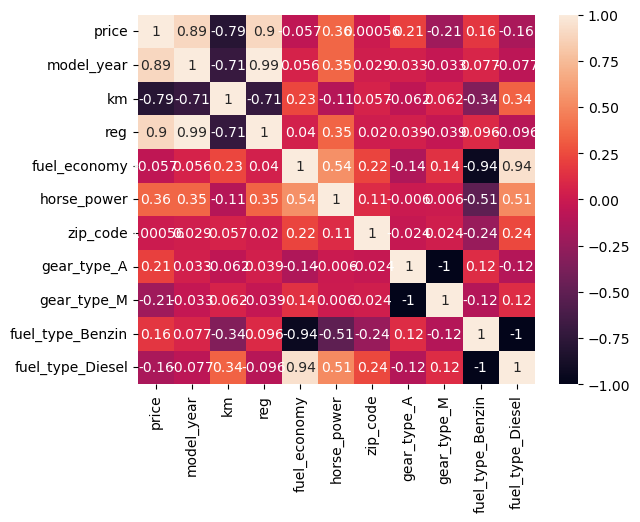

In [32]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

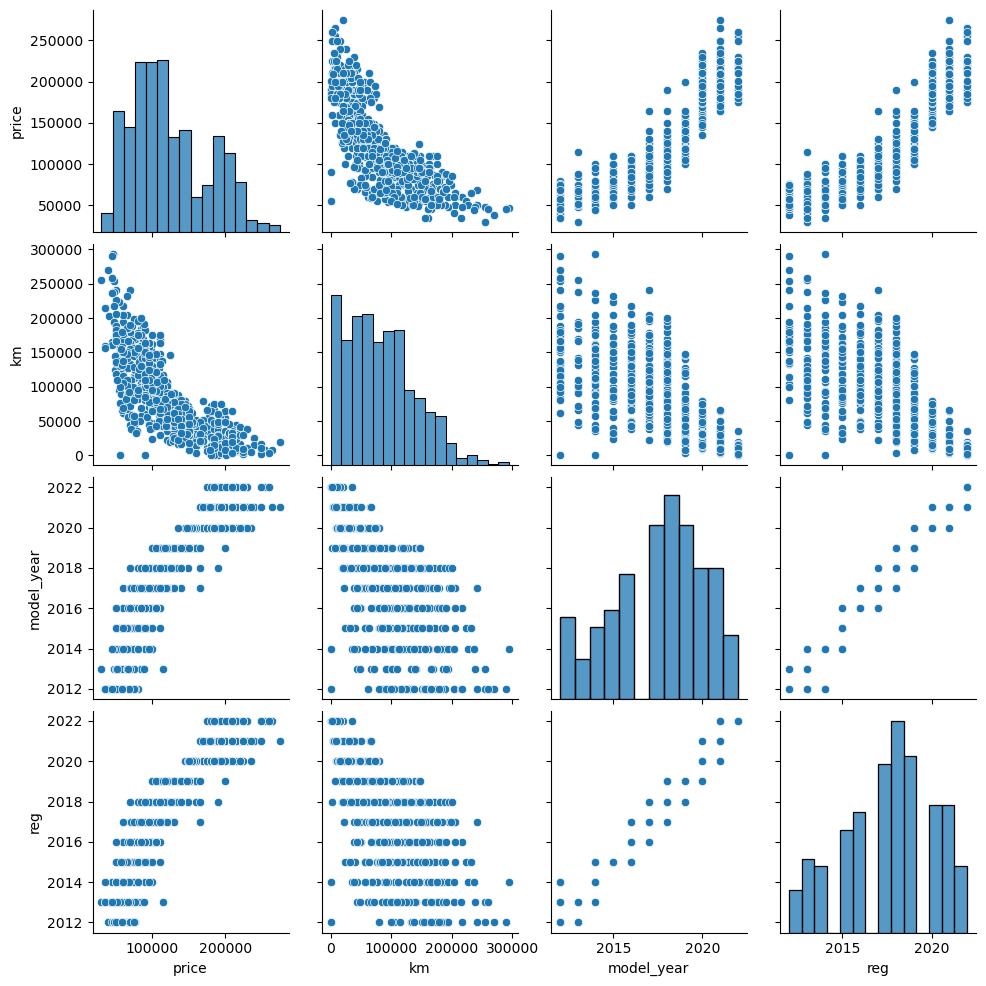

In [33]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

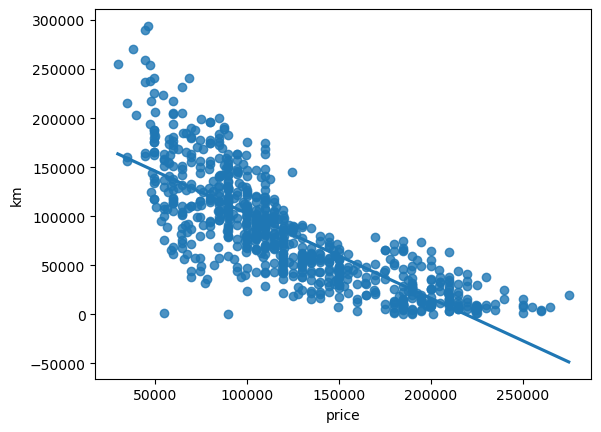

In [34]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

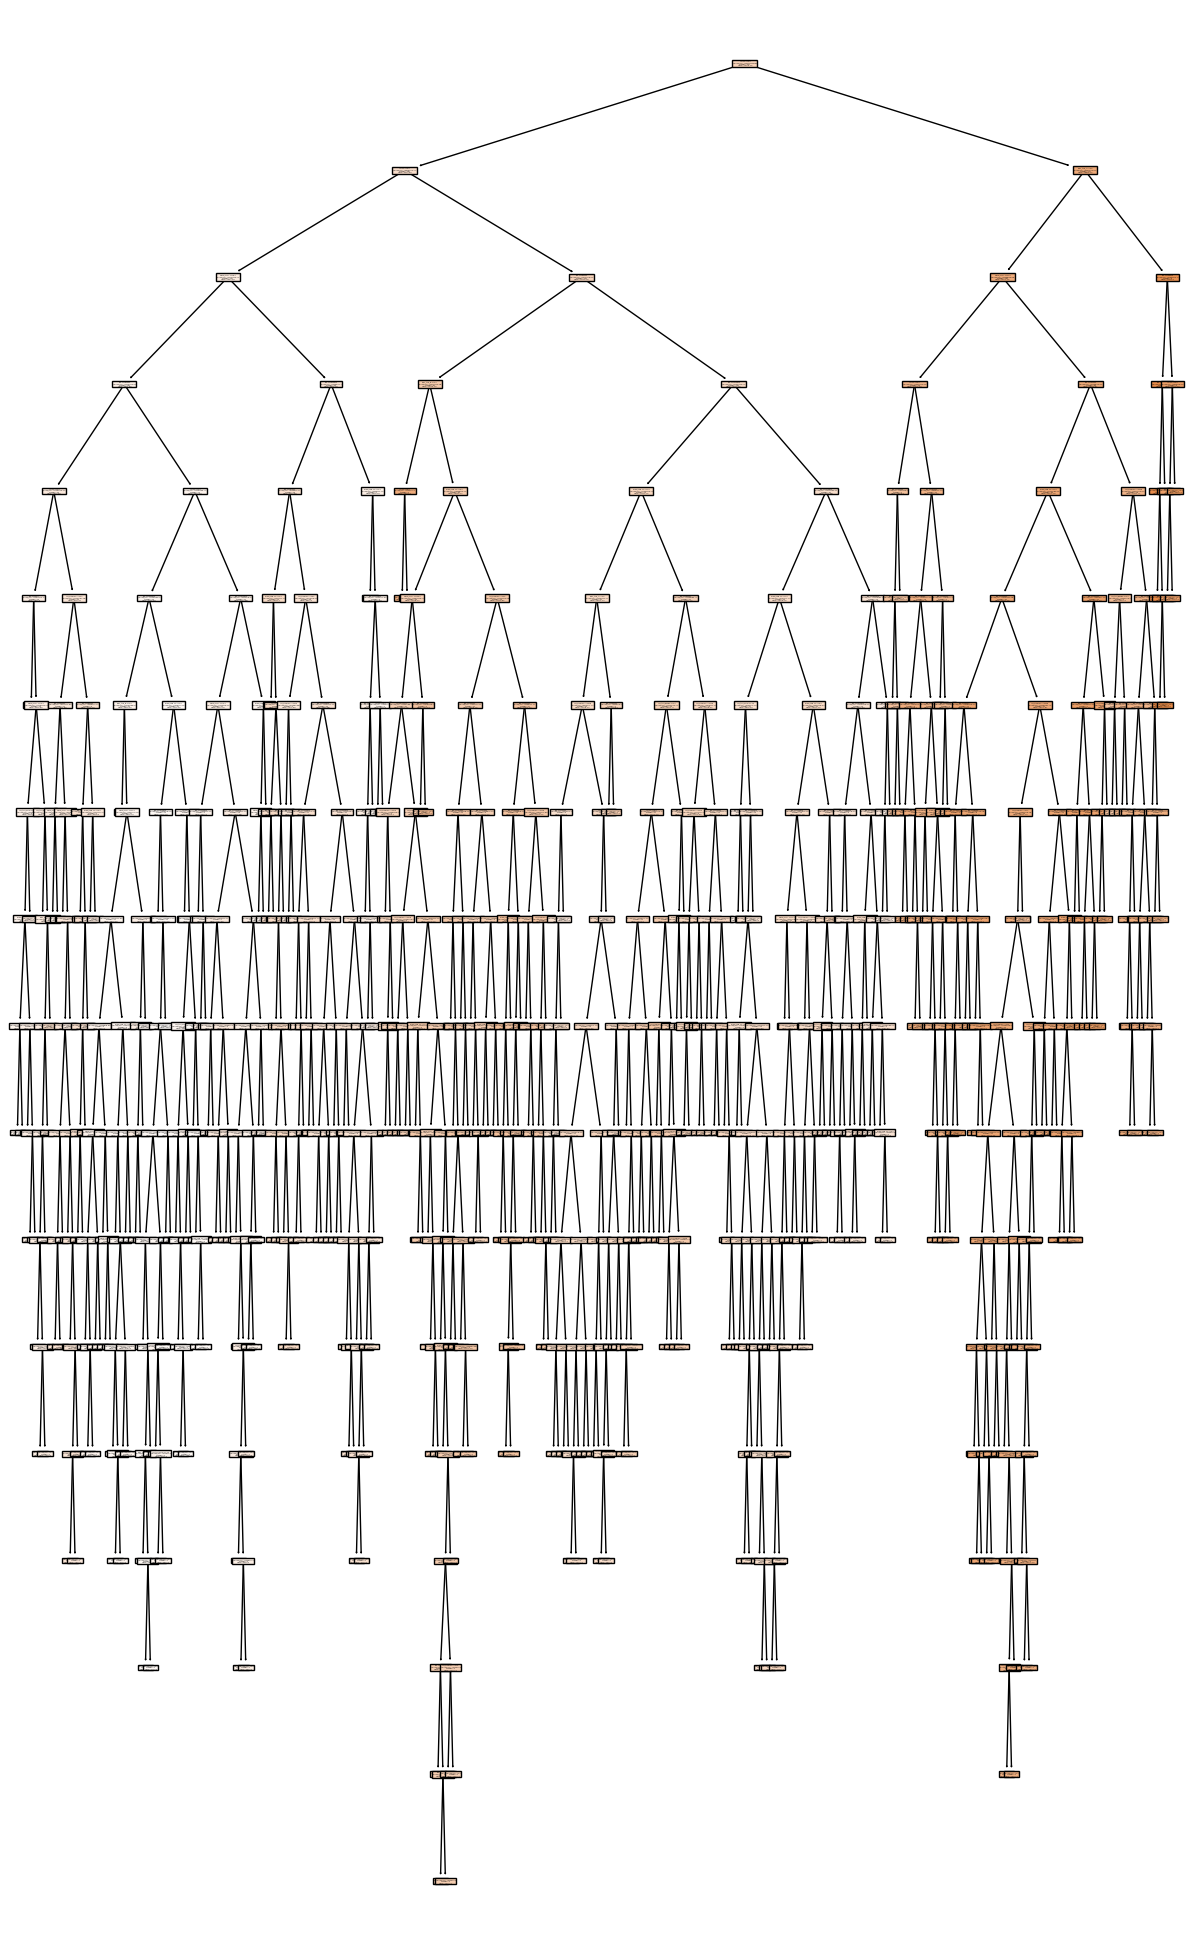

In [35]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)